# HOG TOWN
## Exploring Toronto's Neighborhoods and Boroughs

## Table of Contents for Assignment<a name="toc"></a>

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1.  <a href="#item1">Scrape Wikipedia Postal Code data into a pandas dataframe</a>

    1.1  <a href="#item11">Print the shape of the compiled data frame</a>
    
    
2.  <a href="#item2">Find the coordinates for each postal code</a>

    2.1  <a href="#item21">Print complete data frame with longitude and latitude</a>
        

3.  <a href="#item3">Analyze Each Neighborhood</a>

    3.1  <a href="#item31">Map of neighborhood clusters</a>
        
    3.2  <a href="#item32">Observations from clustering</a>
        
    </font>
    </div>

### Extras for those who are interested

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1.  <a href="#annex1">A better source for Toronto neighbourhood data</a>

    </font>
    </div>


## 1. Scrape Wikipedia Postal Code data into a pandas dataframe <a name="item1"></a>

The Toronto bourough and neighborhood data is scraped from the following Wikipedia page of Forward Sortation Areas;  
&nbsp;&nbsp;&nbsp;&nbsp; https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M



In [1]:
# Import the required libraries

import pandas as pd
import numpy as np

import requests
from bs4 import BeautifulSoup as bs
import re

In [2]:
# Create a blank pandas data frame for storing the results
YYZ_neighborhoods = pd.DataFrame(columns=['Postal Code', 'Borough', 'Neighborhood'])

In [3]:
# Read the wikipedia page into beautiful soup and select just the postal code table cells

url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
r = requests.get(url)

soup = bs(r.content)
tables = soup.select("tbody")
postal_code_table_cells = tables[0].select("td")

In [4]:
# Loop through each cell in the postal code table

for cell in postal_code_table_cells:
    
    # Extract the cell text into a list
    cell_text = cell.find_all(text=True)

    # Check for missed unique items by splitting on any '/' and adding missed elements to the cell_text list
    for idx, item in enumerate(cell_text):
        temp = item.split('/')
        if len(temp)>1:
            cell_text.pop(idx)
            for n, part in enumerate(temp):
                cell_text.insert(idx+n,temp[n])
                
    # Define a new list to store cleaned cell_text data
    modified_cell_text = []

    # Use REGEX to remove unwanted characters ('/','\','(', and ')') and label it as empty if no characters remain
    for i, name in enumerate(cell_text):
        modified_cell_text.append(re.sub(r'[\(\),\/\n]', '', str(name))) 
        if len(re.sub(r'[\s]', '', modified_cell_text[-1])) == 0:
            modified_cell_text[-1] = 'empty'
    
    # Use list comprehension to remove the empty items from the modified_cell_text list
    modified_cell_text = [x for x in modified_cell_text if str(x) != 'empty']
    
    # Remove leading and trailing white spaces using REGEX
    modified_cell_text = [re.sub(r'^\s+|\s+$', '', x) for x in modified_cell_text]
    
    # The extraction removed cardinal and mid-cardinal directions from their associated neighbourhoods and boroughs
    # Put them back and remove the direction element of the modified_cell_text list
    for idx, name in enumerate(modified_cell_text):
        if name.lower() in ['north', 'south', 'east', 'west', 'nw', 'ne', 'se', 'sw']:
            modified_cell_text[idx-1]+=' '+modified_cell_text[idx]
            modified_cell_text[idx]='empty'
    modified_cell_text = [x for x in modified_cell_text if str(x) != 'empty']
        
        
    # Ignoring lines where the borough is 'Not assigned' add the three required fields 
    # for each neighbourhood to the data frame
    if 'Not assigned' not in modified_cell_text:
        print('Postal Code: ', modified_cell_text[0])
        print('Borough: ', modified_cell_text[1])
        print('Neighbourhoods:', modified_cell_text[2:],'\n')
            
        for i in range(2,len(modified_cell_text)):
            YYZ_neighborhoods.loc[len(YYZ_neighborhoods)] = [modified_cell_text[0],modified_cell_text[1],modified_cell_text[i]]
            

Postal Code:  M3A
Borough:  North York
Neighbourhoods: ['Parkwoods'] 

Postal Code:  M4A
Borough:  North York
Neighbourhoods: ['Victoria Village'] 

Postal Code:  M5A
Borough:  Downtown Toronto
Neighbourhoods: ['Regent Park', 'Harbourfront'] 

Postal Code:  M6A
Borough:  North York
Neighbourhoods: ['Lawrence Manor', 'Lawrence Heights'] 

Postal Code:  M7A
Borough:  Queen's Park
Neighbourhoods: ['Ontario Provincial Government'] 

Postal Code:  M9A
Borough:  Etobicoke
Neighbourhoods: ['Islington Avenue'] 

Postal Code:  M1B
Borough:  Scarborough
Neighbourhoods: ['Malvern', 'Rouge'] 

Postal Code:  M3B
Borough:  North York
Neighbourhoods: ['Don Mills North'] 

Postal Code:  M4B
Borough:  East York
Neighbourhoods: ['Parkview Hill', 'Woodbine Gardens'] 

Postal Code:  M5B
Borough:  Downtown Toronto
Neighbourhoods: ['Garden District', 'Ryerson'] 

Postal Code:  M6B
Borough:  North York
Neighbourhoods: ['Glencairn'] 

Postal Code:  M9B
Borough:  Etobicoke
Neighbourhoods: ['West Deane Park', '

In [5]:
# Display the resulting dataframe
YYZ_neighborhoods.head()         

Postal Code           Borough      Neighborhood
0         M3A        North York         Parkwoods
1         M4A        North York  Victoria Village
2         M5A  Downtown Toronto       Regent Park
3         M5A  Downtown Toronto      Harbourfront
4         M6A        North York    Lawrence Manor

### Continue the data cleaning using pandas

In [6]:
# M7Y is the business reply mail processing centre in the Eastern Enclave of postal code M4L (East Toronto)
# The web scraping hints provided seem to indicate that this should be it's own borough of 'East Toronto Business'
# I believe the Borough should be East Toronto which was identified by my scraping and I have left it as that.
# 
# I have added 'East Toronto Business' as a neighbourhood but it is unlikely to be associated with anything 
# in foursquare and as an enclave of M4L it should be dropped.

print(YYZ_neighborhoods.loc[YYZ_neighborhoods['Postal Code']=='M7Y'],'\n')

YYZ_neighborhoods.iloc[216]['Neighborhood']='East Toronto Business'
YYZ_neighborhoods.drop([213,214,215], axis=0, inplace=True)
YYZ_neighborhoods.reset_index(drop=True, inplace=True)

YYZ_neighborhoods.loc[YYZ_neighborhoods['Postal Code']=='M7Y']

    Postal Code       Borough         Neighborhood
213         M7Y  East Toronto  Business reply mail
214         M7Y  East Toronto    Processing Centre
215         M7Y  East Toronto          969 Eastern
216         M7Y  East Toronto       Enclave of M4L 



Postal Code       Borough           Neighborhood
213         M7Y  East Toronto  East Toronto Business

In [7]:
# M7R was identified as being in the borough of Mississauga by my web scraping
# As it is an enclave of L4W and is only the processing centre it should likely be dropped all together.
# To be consistent with the assignment 'hints' I have left the Centre as a 'neighbourhood' of Mississauga
# although it makes little sense gto me.

print(YYZ_neighborhoods.loc[YYZ_neighborhoods['Postal Code']=='M7R'],'\n')

YYZ_neighborhoods.drop([140], axis=0, inplace=True)
YYZ_neighborhoods.reset_index(drop=True, inplace=True)

YYZ_neighborhoods.loc[YYZ_neighborhoods['Postal Code']=='M7R']

    Postal Code      Borough                           Neighborhood
139         M7R  Mississauga  Canada Post Gateway Processing Centre
140         M7R  Mississauga                         Enclave of L4W 



Postal Code      Borough                           Neighborhood
139         M7R  Mississauga  Canada Post Gateway Processing Centre

In [8]:
# M5W was correctly identified as Downtown Toronto in my web scraping.
# The hints suggest this should be Downtown Toronto Station A which does not make sense to me.
# This is a post office station in Downtown Toronto, and an enclave of M5E, so I have left it as that.
# to be consistent with the notes I have added "The Esplanade" to the list of neighbourhoods although this does not seem appropriate.

print(YYZ_neighborhoods.loc[YYZ_neighborhoods['Postal Code']=='M5W'],'\n')

YYZ_neighborhoods.iloc[189]['Neighborhood']='The Esplanade'
YYZ_neighborhoods.drop([188,190], axis=0, inplace=True)
YYZ_neighborhoods.reset_index(drop=True, inplace=True)

YYZ_neighborhoods.loc[YYZ_neighborhoods['Postal Code']=='M5W']

    Postal Code           Borough      Neighborhood
188         M5W  Downtown Toronto    Stn A PO Boxes
189         M5W  Downtown Toronto  25 The Esplanade
190         M5W  Downtown Toronto    Enclave of M5E 



Postal Code           Borough   Neighborhood
188         M5W  Downtown Toronto  The Esplanade

In [9]:
# In M9W the Borough was identified as 'Etobicoke' rather than 'Etobicoke Northwest' 
# Depending on how you define boroughs this may or may not be correct but to align with the hints
# the Borough is modified below.

print(YYZ_neighborhoods.loc[YYZ_neighborhoods['Postal Code']=='M9W'],'\n')

for n in range(191,201):
    YYZ_neighborhoods.iloc[n]['Borough']='Etobicoke Northwest'
    
# The improperly defined neighbourhood 'Northwest' is then dropped
YYZ_neighborhoods.drop([191], axis=0, inplace=True)
YYZ_neighborhoods.reset_index(drop=True, inplace=True)

YYZ_neighborhoods.loc[YYZ_neighborhoods['Postal Code']=='M9W']

    Postal Code    Borough     Neighborhood
191         M9W  Etobicoke        Northwest
192         M9W  Etobicoke       Clairville
193         M9W  Etobicoke       Humberwood
194         M9W  Etobicoke   Woodbine Downs
195         M9W  Etobicoke      West Humber
196         M9W  Etobicoke  Kipling Heights
197         M9W  Etobicoke          Rexdale
198         M9W  Etobicoke             Elms
199         M9W  Etobicoke        Tandridge
200         M9W  Etobicoke      Old Rexdale 



Postal Code              Borough     Neighborhood
191         M9W  Etobicoke Northwest       Clairville
192         M9W  Etobicoke Northwest       Humberwood
193         M9W  Etobicoke Northwest   Woodbine Downs
194         M9W  Etobicoke Northwest      West Humber
195         M9W  Etobicoke Northwest  Kipling Heights
196         M9W  Etobicoke Northwest          Rexdale
197         M9W  Etobicoke Northwest             Elms
198         M9W  Etobicoke Northwest        Tandridge
199         M9W  Etobicoke Northwest      Old Rexdale

In [10]:
# In M4J the neighborhood of 'The Danforth East' falls in the boroughs of East York and East Toronto.
# This was not captured properly by my web scraping as 'East Toronto' followed the prototype for a neighbourhood. 

# Given the fact this will be used for clustering foursquare items "The Danforth East" should likely be 
# identified as a neighbourhood is each of the Boroughs rather than creating a "new" borough entry with this 
# one community.

# Despite this, the borough will be labelled as East York/East Toronto as per the assignment directions.

print(YYZ_neighborhoods.loc[YYZ_neighborhoods['Postal Code']=='M4J'],'\n')

YYZ_neighborhoods.iloc[62]['Borough']='East York/East Toronto'
    
# The improperly defined neighbourhood 'Northwest' is then dropped
YYZ_neighborhoods.drop([61], axis=0, inplace=True)
YYZ_neighborhoods.reset_index(drop=True, inplace=True)

YYZ_neighborhoods.loc[YYZ_neighborhoods['Postal Code']=='M4J']

   Postal Code    Borough       Neighborhood
61         M4J  East York       East Toronto
62         M4J  East York  The Danforth East 



Postal Code                 Borough       Neighborhood
61         M4J  East York/East Toronto  The Danforth East

### Bring the neighbourhoods back together
Define a new data frame YYZ_boroughs which collects the neighbourhoods together for each borough seperating neighborhoods with a comma

In [11]:
# Create the new data frame YYZ_boroughs with all the neighbourhoods in a string for a given postal code
# Start by defining the data frame
YYZ_boroughs = pd.DataFrame()

# Make a unique list of postal codes to catch and concatinate any duplicate records
postal_code_list = set(YYZ_neighborhoods['Postal Code'].to_list())

# Loop over the unique postal_code_list and add a new row of data to the YYZ_boroughs dataframe
for postal_code in postal_code_list:
    
    # Make a list of neighborhoods in the given postal code
    neighborhoods_in_postal_code = (YYZ_neighborhoods.loc[YYZ_neighborhoods['Postal Code']==postal_code].Neighborhood).to_list()
    
    # Join the postal code neighbourhoods together seperated by a comma in a string
    neighborhood_string = ', '.join(neighborhoods_in_postal_code)
    
    # Identify the borough for the postal code
    borough = YYZ_neighborhoods.loc[YYZ_neighborhoods['Postal Code']==postal_code].Borough.unique()[0]
    
    # Define a new row with the postal_code, borough, and neighbourhood string then add it to the new data frame
    new_row = pd.DataFrame([pd.Series([postal_code, borough, neighborhood_string])])
    YYZ_boroughs = pd.concat([new_row, YYZ_boroughs], ignore_index=True)

# Label the columns in the new data frame
YYZ_boroughs.columns=['Postal Code', 'Borough', 'Neighborhood']

# Check the new dataframe
YYZ_boroughs.head(7)

Postal Code           Borough  \
0         M9L        North York   
1         M2P        North York   
2         M5B  Downtown Toronto   
3         M9M        North York   
4         M8X         Etobicoke   
5         M5X  Downtown Toronto   
6         M9R         Etobicoke   

                                        Neighborhood  
0                                      Humber Summit  
1                                    York Mills West  
2                           Garden District, Ryerson  
3                                   Humberlea, Emery  
4      The Kingsway, Montgomery Road, Old Mill North  
5             First Canadian Place, Underground city  
6  Kingsview Village, St. Phillips, Martin Grove ...

### 1.1 Print the shape of the compiled data frame <a name="item11"></a>

In [12]:
print(f"There are {YYZ_boroughs.shape[0]} Postal Codes identified as having boroughs and neighbourhoods.\n")
print(f"These include {len(YYZ_boroughs.Borough.unique())} unique Boroughs:")
print(', '.join(YYZ_boroughs.Borough.unique()),"\n")

print(f" The shape of the dataframe is {YYZ_boroughs.shape}")

There are 103 Postal Codes identified as having boroughs and neighbourhoods.

These include 13 unique Boroughs:
North York, Downtown Toronto, Etobicoke, Scarborough, York, Etobicoke Northwest, East York, East Toronto, West Toronto, Central Toronto, East York/East Toronto, Mississauga, Queen's Park 

 The shape of the dataframe is (103, 3)


[Go back to Table of Contents](#toc)

## 2. Find the coordinates for each postal code <a name="item2"></a>

In [13]:
# Import required libraries
#!pip install geocoder
import geocoder

In [14]:
# Make a list of the postal codes in the YYZ_Boroughs dataframe
postal_code_list = YYZ_boroughs['Postal Code'].to_list()

Loop through the list of postal codes searching for the coordinates and adding them to the YYZ_boroughs dataframe

In [15]:
for postal_code in postal_code_list:
    
    print(f'\nProcessing postal code {postal_code}')
    
    # initialize your variable to None
    lat_lng_coords = None

    # loop until you get the coordinates
    count = 0
    while(lat_lng_coords is None and count<3):
        g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
        lat_lng_coords = g.latlng
        count+=1
    if lat_lng_coords is None:
        print('failed to get coordinates')
    else:
        YYZ_boroughs.loc[YYZ_boroughs['Postal Code']==postal_code]['Latitude']=lat_lng_coords[0]
        YYZ_boroughs.loc[YYZ_boroughs['Postal Code']==postal_code]['Longitude']=lat_lng_coords[1]
    
    print(YYZ_boroughs.loc[YYZ_boroughs['Postal Code']==postal_code])


Processing postal code M9L
failed to get coordinates
  Postal Code     Borough   Neighborhood
0         M9L  North York  Humber Summit

Processing postal code M2P
failed to get coordinates
  Postal Code     Borough     Neighborhood
1         M2P  North York  York Mills West

Processing postal code M5B
failed to get coordinates
  Postal Code           Borough              Neighborhood
2         M5B  Downtown Toronto  Garden District, Ryerson

Processing postal code M9M
failed to get coordinates
  Postal Code     Borough      Neighborhood
3         M9M  North York  Humberlea, Emery

Processing postal code M8X
failed to get coordinates
  Postal Code    Borough                                   Neighborhood
4         M8X  Etobicoke  The Kingsway, Montgomery Road, Old Mill North

Processing postal code M5X
failed to get coordinates
  Postal Code           Borough                            Neighborhood
5         M5X  Downtown Toronto  First Canadian Place, Underground city

Processing post

failed to get coordinates
   Postal Code           Borough                 Neighborhood
48         M4X  Downtown Toronto  St. James Town, Cabbagetown

Processing postal code M9B
failed to get coordinates
   Postal Code    Borough                                       Neighborhood
49         M9B  Etobicoke  West Deane Park, Princess Gardens, Martin Grov...

Processing postal code M6R
failed to get coordinates
   Postal Code       Borough            Neighborhood
50         M6R  West Toronto  Parkdale, Roncesvalles

Processing postal code M9P
failed to get coordinates
   Postal Code    Borough Neighborhood
51         M9P  Etobicoke    Westmount

Processing postal code M1M
failed to get coordinates
   Postal Code      Borough                                     Neighborhood
52         M1M  Scarborough  Cliffside, Cliffcrest, Scarborough Village West

Processing postal code M4T
failed to get coordinates
   Postal Code          Borough                 Neighborhood
53         M4T  Central Tor

failed to get coordinates
   Postal Code       Borough                   Neighborhood
98         M7A  Queen's Park  Ontario Provincial Government

Processing postal code M5N
failed to get coordinates
   Postal Code          Borough Neighborhood
99         M5N  Central Toronto     Roselawn

Processing postal code M5P
failed to get coordinates
    Postal Code          Borough               Neighborhood
100         M5P  Central Toronto  Forest Hill, North & West

Processing postal code M4Y
failed to get coordinates
    Postal Code           Borough          Neighborhood
101         M4Y  Downtown Toronto  Church and Wellesley

Processing postal code M4W
failed to get coordinates
    Postal Code           Borough Neighborhood
102         M4W  Downtown Toronto     Rosedale


This method failed so read the CSV file provided by the instructor

In [16]:
filename = "C:/Users/Fowle/Desktop/IBM Data Science Course/Course 9 - Applied Data Science Capstone Project/week3/Geospatial_Coordinates.csv"

In [17]:
supplied_postal_code_data = pd.read_csv(filename)

In [18]:
#Let's check the data
supplied_postal_code_data

Postal Code   Latitude  Longitude
0           M1B  43.806686 -79.194353
1           M1C  43.784535 -79.160497
2           M1E  43.763573 -79.188711
3           M1G  43.770992 -79.216917
4           M1H  43.773136 -79.239476
..          ...        ...        ...
98          M9N  43.706876 -79.518188
99          M9P  43.696319 -79.532242
100         M9R  43.688905 -79.554724
101         M9V  43.739416 -79.588437
102         M9W  43.706748 -79.594054

[103 rows x 3 columns]

In [19]:
# Add the postal code coordinates into the YYZ_boroughs data frame
YYZ_boroughs = YYZ_boroughs.merge(supplied_postal_code_data, on='Postal Code', how='left')

### 2.1 Print complete data frame with longitude and latitude <a name="item21"></a>

In [20]:
YYZ_boroughs

Postal Code           Borough  \
0           M9L        North York   
1           M2P        North York   
2           M5B  Downtown Toronto   
3           M9M        North York   
4           M8X         Etobicoke   
..          ...               ...   
98          M7A      Queen's Park   
99          M5N   Central Toronto   
100         M5P   Central Toronto   
101         M4Y  Downtown Toronto   
102         M4W  Downtown Toronto   

                                      Neighborhood   Latitude  Longitude  
0                                    Humber Summit  43.756303 -79.565963  
1                                  York Mills West  43.752758 -79.400049  
2                         Garden District, Ryerson  43.657162 -79.378937  
3                                 Humberlea, Emery  43.724766 -79.532242  
4    The Kingsway, Montgomery Road, Old Mill North  43.653654 -79.506944  
..                                             ...        ...        ...  
98                   Ontario Provincial Government  43.662301 -79.389494  
99                                        Roselawn  43.711695 -79.416936  
100                      Forest Hill, North & West  43.696948 -79.411307  
101                           Church and Wellesley  43.665860 -79.383160  
102                                       Rosedale  43.679563 -79.377529  

[103 rows x 5 columns]

[Go back to Table of Contents](#toc)

## 3. Analyze each 'neighbourhood' / Forward Sortation Area <a name="item3"></a>

In [21]:
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

print('Libraries imported.')

Libraries imported.


In [22]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
yyz_latitude = location.latitude
yyz_longitude = location.longitude

address, yyz_latitude, yyz_longitude

('Toronto, Canada', 43.6534817, -79.3839347)

In [23]:
# create map of Toronto using latitude and longitude values
yyz_map = folium.Map(location=[yyz_latitude, yyz_longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(YYZ_boroughs['Latitude'], YYZ_boroughs['Longitude'], YYZ_boroughs['Borough'], YYZ_boroughs['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(yyz_map)  
    
yyz_map

Copy of map for visualizing on GitHub


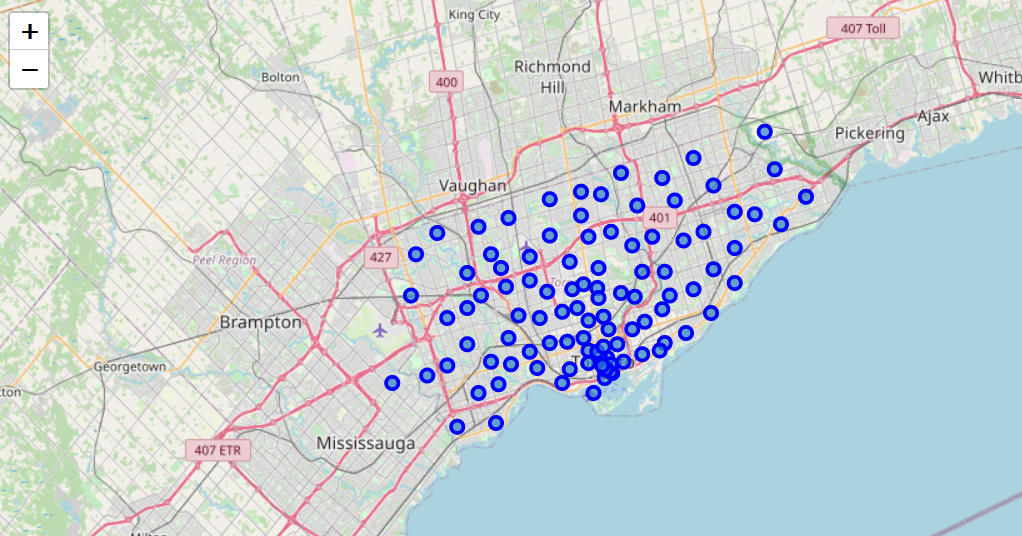

In [24]:
old_toronto_data = YYZ_boroughs[YYZ_boroughs['Borough'].str.contains('Toronto')].reset_index(drop=True)
old_toronto_data.head()

Postal Code           Borough  \
0         M5B  Downtown Toronto   
1         M5X  Downtown Toronto   
2         M5E  Downtown Toronto   
3         M5K  Downtown Toronto   
4         M5J  Downtown Toronto   

                                        Neighborhood   Latitude  Longitude  
0                           Garden District, Ryerson  43.657162 -79.378937  
1             First Canadian Place, Underground city  43.648429 -79.382280  
2                                        Berczy Park  43.644771 -79.373306  
3           Toronto Dominion Centre, Design Exchange  43.647177 -79.381576  
4  Harbourfront East, Union Station, Toronto Islands  43.640816 -79.381752

In [25]:
# create map of old Toronto using latitude and longitude values
map_old_toronto = folium.Map(location=[yyz_latitude, yyz_longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(old_toronto_data['Latitude'], old_toronto_data['Longitude'], old_toronto_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_old_toronto)  
    
map_old_toronto

Copy image to allow visualization on GitHub

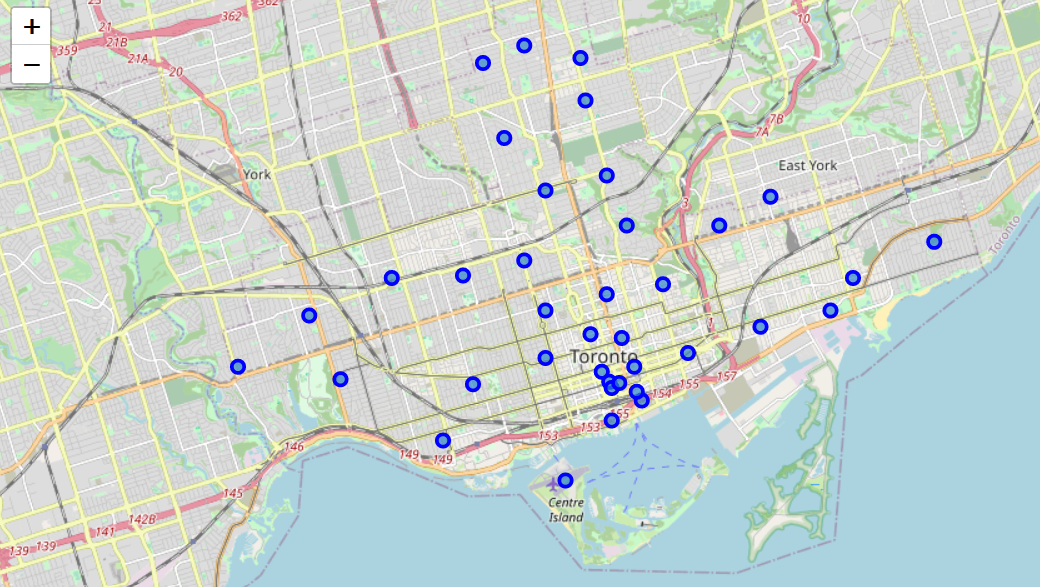

In [26]:
# Credentials for FourSquare

In [27]:
old_toronto_data.loc[0, 'Neighborhood']

'Garden District, Ryerson'

In [28]:
neighborhood_latitude = old_toronto_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = old_toronto_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = old_toronto_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Garden District, Ryerson are 43.6571618, -79.37893709999999.


In [29]:
from math import pi as PI
# Old toronto is approximatly 97 square kilometers.
print("Number of communities in old Toronto", old_toronto_data.shape[0])
# with 39 communities the average size is 2.5 square kilometers.
R = round((2.5*1e6/PI)**0.5,0)
print('Radius for 2.5 square kilometers: ', R, 'm')


Number of communities in old Toronto 39
Radius for 2.5 square kilometers:  892.0 m


In [30]:
# create URL
radius = R

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=IUPWLVTPUQYOERBFHFDXWU3SHY1JRSTW1PNAYXZ1XSLJPANN&client_secret=C3F2YFS3N4UCR2JMW2K5UD1AFPAPUJ23VKJEOKYISIELY3BH&v=20180604&ll=43.6571618,-79.37893709999999&radius=892.0&limit=30'

In [31]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60da08bd11af0c62675737a9'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Downtown Toronto',
  'headerFullLocation': 'Downtown Toronto, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 152,
  'suggestedBounds': {'ne': {'lat': 43.665189808028,
    'lng': -79.36786149304758},
   'sw': {'lat': 43.64913379197199, 'lng': -79.39001270695239}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '56d4d1b3cd1035fe77e1492c',
       'name': 'Page One Cafe',
       'location': {'address': '106 Mutual St',
        'crossStreet': 'btwn Dundas & Gould St',
        'lat': 43.65777161112601,
        'lng': -79.3760725691681,
        'labe

In [32]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [33]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name     categories        lat        lng
0        Page One Cafe           Café  43.657772 -79.376073
1          Blaze Pizza    Pizza Place  43.656518 -79.380015
2          Oakham Café           Café  43.658078 -79.378315
3  Silver Snail Comics     Comic Shop  43.657031 -79.381403
4         Burrito Boyz  Burrito Place  43.656265 -79.378343

In [34]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

30 venues were returned by Foursquare.


In [35]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [36]:
old_toronto_venues = getNearbyVenues(names=old_toronto_data['Neighborhood'],
                                   latitudes=old_toronto_data['Latitude'],
                                   longitudes=old_toronto_data['Longitude']
                                  )

Garden District, Ryerson
First Canadian Place, Underground city
Berczy Park
Toronto Dominion Centre, Design Exchange
Harbourfront East, Union Station, Toronto Islands
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
The Esplanade
The Danforth West, Riverdale
Regent Park, Harbourfront
Runnymede, Swansea
Dufferin, Dovercourt Village
Lawrence Park
University of Toronto, Harbord
St. James Town, Cabbagetown
Parkdale, Roncesvalles
Moore Park, Summerhill East
Central, Bay Street
St. James Town
Studio District
Davisville North
India Bazaar, The Beaches West
Kensington Market, Chinatown, Grange Park
North Toronto West
The Beaches
Little Portugal, Trinity
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
East Toronto Business
Commerce Court, Victoria Hotel
Davisville
The Danforth East
Christie
Richmond, Adelaide, King
High Park, The Junction South
The Annex, North Midtown, Yorkville
Brockton, Parkdale Village, Exhibition P

In [38]:
print(old_toronto_venues.shape)
old_toronto_venues.head()
old_toronto_venues.loc[old_toronto_venues['Neighborhood']=='Moore Park, Summerhill East']

(799, 7)


Neighborhood  Neighborhood Latitude  \
372  Moore Park, Summerhill East              43.689574   
373  Moore Park, Summerhill East              43.689574   

     Neighborhood Longitude                      Venue  Venue Latitude  \
372               -79.38316                       Reds       43.692816   
373               -79.38316  Marston International ADR       43.686093   

     Venue Longitude Venue Category  
372       -79.384504     Restaurant  
373       -79.383178         Lawyer

In [39]:
old_toronto_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                                
Berczy Park                                                            30   
Brockton, Parkdale Village, Exhibition Place                           22   
CN Tower, King and Spadina, Railway Lands, Harb...                     15   
Central, Bay Street                                                    30   
Christie                                                               14   
Church and Wellesley                                                   30   
Commerce Court, Victoria Hotel                                         30   
Davisville                                                             30   
Davisville North                                                       10   
Dufferin, Dovercourt Village                                           12   
East Toronto Business                                                  17   
First Canadian Place, Underground city                                 30   
Forest Hill, North & West                                               4   
Garden District, Ryerson                                               30   
Harbourfront East, Union Station, Toronto Islands                      30   
High Park, The Junction South                                          19   
India Bazaar, The Beaches West                                         17   
Kensington Market, Chinatown, Grange Park                              30   
Lawrence Park                                                           4   
Little Portugal, Trinity                                               30   
Moore Park, Summerhill East                                             2   
North Toronto West                                                     13   
Parkdale, Roncesvalles                                                 11   
Regent Park, Harbourfront                                              30   
Richmond, Adelaide, King                                               30   
Rosedale                                                                4   
Roselawn                                                                3   
Runnymede, Swansea                                                     30   
St. James Town                                                         30   
St. James Town, Cabbagetown                                            30   
Studio District                                                        27   
Summerhill West, Rathnelly, South Hill, Forest ...                     10   
The Annex, North Midtown, Yorkville                                    18   
The Beaches                                                             4   
The Danforth East                                                       3   
The Danforth West, Riverdale                                           30   
The Esplanade                                                          30   
Toronto Dominion Centre, Design Exchange                               30   
University of Toronto, Harbord                                         30   

                                                    Neighborhood Longitude  \
Neighborhood                                                                 
Berczy Park                                                             30   
Brockton, Parkdale Village, Exhibition Place                            22   
CN Tower, King and Spadina, Railway Lands, Harb...                      15   
Central, Bay Street                                                     30   
Christie                                                                14   
Church and Wellesley                                                    30   
Commerce Court, Victoria Hotel                                          30   
Davisville                                                              30   
Davisville North                                                        10   
Dufferin, Dovercourt Village        

In [40]:
print('There are {} uniques categories.'.format(len(old_toronto_venues['Venue Category'].unique())))

There are 176 uniques categories.


In [41]:
# one hot encoding
old_toronto_onehot = pd.get_dummies(old_toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
old_toronto_onehot['Neighborhood'] = old_toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [old_toronto_onehot.columns[-1]] + list(old_toronto_onehot.columns[:-1])
old_toronto_onehot = old_toronto_onehot[fixed_columns]

print(old_toronto_onehot.shape)
old_toronto_onehot.head()

(799, 176)


Yoga Studio  Adult Boutique  Airport  Airport Lounge  Airport Service  \
0            0               0        0               0                0   
1            0               0        0               0                0   
2            0               0        0               0                0   
3            0               0        0               0                0   
4            0               0        0               0                0   

   Airport Terminal  American Restaurant  Aquarium  Art Gallery  \
0                 0                    0         0            0   
1                 0                    0         0            0   
2                 0                    0         0            0   
3                 0                    0         0            0   
4                 0                    0         0            0   

   Arts & Crafts Store  ...  Theme Restaurant  Thrift / Vintage Store  \
0                    0  ...                 0                       0   
1                    0  ...                 0                       0   
2                    0  ...                 0                       0   
3                    0  ...                 0                       0   
4                    0  ...                 0                       0   

   Toy / Game Store  Trail  Train Station  Vegetarian / Vegan Restaurant  \
0                 0      0              0                              0   
1                 0      0              0                              0   
2                 0      0              0                              0   
3                 0      0              0                              0   
4                 0      0              0                              0   

   Video Game Store  Vietnamese Restaurant  Wine Bar  Wine Shop  
0                 0                      0         0          0  
1                 0                      0         0          0  
2                 0                      0         0          0  
3                 0                      0         0          0  
4                 0                      0         0          0  

[5 rows x 176 columns]

In [42]:
old_toronto_grouped = old_toronto_onehot.groupby('Neighborhood').mean().reset_index()
old_toronto_grouped

Neighborhood  Yoga Studio  \
0                                         Berczy Park     0.000000   
1        Brockton, Parkdale Village, Exhibition Place     0.045455   
2   CN Tower, King and Spadina, Railway Lands, Har...     0.000000   
3                                 Central, Bay Street     0.033333   
4                                            Christie     0.000000   
5                                Church and Wellesley     0.000000   
6                      Commerce Court, Victoria Hotel     0.000000   
7                                          Davisville     0.000000   
8                                    Davisville North     0.000000   
9                        Dufferin, Dovercourt Village     0.000000   
10                              East Toronto Business     0.000000   
11             First Canadian Place, Underground city     0.000000   
12                          Forest Hill, North & West     0.000000   
13                           Garden District, Ryerson     0.000000   
14  Harbourfront East, Union Station, Toronto Islands     0.000000   
15                      High Park, The Junction South     0.000000   
16                     India Bazaar, The Beaches West     0.000000   
17          Kensington Market, Chinatown, Grange Park     0.000000   
18                                      Lawrence Park     0.000000   
19                           Little Portugal, Trinity     0.033333   
20                        Moore Park, Summerhill East     0.000000   
21                                 North Toronto West     0.000000   
22                             Parkdale, Roncesvalles     0.000000   
23                          Regent Park, Harbourfront     0.000000   
24                           Richmond, Adelaide, King     0.000000   
25                                           Rosedale     0.000000   
26                                           Roselawn     0.000000   
27                                 Runnymede, Swansea     0.033333   
28                                     St. James Town     0.000000   
29                        St. James Town, Cabbagetown     0.000000   
30                                    Studio District     0.000000   
31  Summerhill West, Rathnelly, South Hill, Forest...     0.000000   
32                The Annex, North Midtown, Yorkville     0.000000   
33                                        The Beaches     0.000000   
34                                  The Danforth East     0.000000   
35                       The Danforth West, Riverdale     0.033333   
36                                      The Esplanade     0.000000   
37           Toronto Dominion Centre, Design Exchange     0.000000   
38                     University of Toronto, Harbord     0.000000   

    Adult Boutique   Airport  Airport Lounge  Airport Service  \
0         0.000000  0.000000        0.000000         0.000000   
1         0.000000  0.000000        0.000000         0.000000   
2         0.000000  0.066667        0.133333         0.133333   
3         0.000000  0.000000        0.000000         0.000000   
4         0.000000  0.000000        0.000000         0.000000   
5         0.033333  0.000000        0.000000         0.000000   
6         0.000000  0.000000        0.000000         0.000000   
7         0.000000  0.000000        0.000000         0.000000   
8         0.000000  0.000000        0.000000         0.000000   
9         0.000000  0.000000        0.000000         0.000000   
10        0.000000  0.000000        0.000000         0.000000   
11        0.000000  0.000000        0.000000         0.000000   
12        0.000000  0.000000        0.000000         0.000000   
13        0.000000  0.000000        0.000000         0.000000   
14        0.000000  0.000000        0.000000         0.000000   
15        0.000000  0.000000        0.000000         0.000000   
16        0.000000  0.000000        0.000000         0.000000   
17        0.000000  0.000000        0.000000         0.000000   
18   

In [43]:
old_toronto_grouped.shape

(39, 176)

In [44]:
num_top_venues = 5

for hood in old_toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = old_toronto_grouped[old_toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0  Seafood Restaurant  0.07
1        Cocktail Bar  0.07
2      Farmers Market  0.07
3            Beer Bar  0.07
4              Bakery  0.07


----Brockton, Parkdale Village, Exhibition Place----
            venue  freq
0  Sandwich Place  0.09
1     Coffee Shop  0.09
2            Café  0.09
3  Breakfast Spot  0.09
4     Yoga Studio  0.05


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
              venue  freq
0    Airport Lounge  0.13
1   Airport Service  0.13
2  Airport Terminal  0.13
3          Boutique  0.07
4           Airport  0.07


----Central, Bay Street----
                 venue  freq
0          Coffee Shop  0.20
1       Sandwich Place  0.13
2     Sushi Restaurant  0.10
3                 Bank  0.07
4  Japanese Restaurant  0.07


----Christie----
           venue  freq
0  Grocery Store  0.29
1           Café  0.21
2           Park  0.14
3     Restaurant  0.07
4 

In [45]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [46]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = old_toronto_grouped['Neighborhood']

for ind in np.arange(old_toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(old_toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue  \
0                                        Berczy Park                Bakery   
1       Brockton, Parkdale Village, Exhibition Place        Sandwich Place   
2  CN Tower, King and Spadina, Railway Lands, Har...        Airport Lounge   
3                                Central, Bay Street           Coffee Shop   
4                                           Christie         Grocery Store   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0    Seafood Restaurant          Cocktail Bar              Beer Bar   
1        Breakfast Spot                  Café           Coffee Shop   
2       Airport Service      Airport Terminal   Rental Car Location   
3        Sandwich Place      Sushi Restaurant   Japanese Restaurant   
4                  Café                  Park            Baby Store   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0        Farmers Market            Bagel Shop             Jazz Club   
1         Grocery Store            Restaurant             Nightclub   
2              Boutique               Airport      Sculpture Garden   
3                  Café                  Bank           Yoga Studio   
4             Nightclub           Coffee Shop            Restaurant   

  8th Most Common Venue        9th Most Common Venue 10th Most Common Venue  
0   Japanese Restaurant                   Restaurant                 Bistro  
1   Japanese Restaurant           Italian Restaurant           Intersection  
2       Harbor / Marina                          Bar            Coffee Shop  
3  Fast Food Restaurant           Italian Restaurant     Falafel Restaurant  
4    Italian Restaurant  Eastern European Restaurant             Donut Shop

In [47]:
# set number of clusters
kclusters = 5

old_toronto_grouped_clustering = old_toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(old_toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0])

### 3.1 Map of clustering <a name="item31"></a>

In [48]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

old_toronto_merged = old_toronto_data

# merge old_toronto_merged to add latitude/longitude for each neighborhood
old_toronto_merged = old_toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

old_toronto_merged.head() # check the last columns!

Postal Code           Borough  \
0         M5B  Downtown Toronto   
1         M5X  Downtown Toronto   
2         M5E  Downtown Toronto   
3         M5K  Downtown Toronto   
4         M5J  Downtown Toronto   

                                        Neighborhood   Latitude  Longitude  \
0                           Garden District, Ryerson  43.657162 -79.378937   
1             First Canadian Place, Underground city  43.648429 -79.382280   
2                                        Berczy Park  43.644771 -79.373306   
3           Toronto Dominion Centre, Design Exchange  43.647177 -79.381576   
4  Harbourfront East, Union Station, Toronto Islands  43.640816 -79.381752   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0               0        Clothing Store               Theater   
1               0                  Café           Coffee Shop   
2               0                Bakery    Seafood Restaurant   
3               0                  Café            Restaurant   
4               0              Aquarium                 Hotel   

       3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0  Middle Eastern Restaurant                  Café           Coffee Shop   
1                 Restaurant                   Gym         Deli / Bodega   
2               Cocktail Bar              Beer Bar        Farmers Market   
3                Coffee Shop                   Gym         Deli / Bodega   
4                       Park           IT Services    Basketball Stadium   

  6th Most Common Venue   7th Most Common Venue 8th Most Common Venue  \
0   Japanese Restaurant      Falafel Restaurant           Pizza Place   
1            Steakhouse  Gluten-free Restaurant              Wine Bar   
2            Bagel Shop               Jazz Club   Japanese Restaurant   
3   Japanese Restaurant                  Museum                 Hotel   
4          Skating Rink                Beer Bar          Dessert Shop   

  9th Most Common Venue      10th Most Common Venue  
0                 Plaza  Modern European Restaurant  
1  Gym / Fitness Center         Japanese Restaurant  
2            Restaurant                      Bistro  
3    Seafood Restaurant                      Bakery  
4                  Lake       Performing Arts Venue

In [50]:
# create map
map_clusters = folium.Map(location=[yyz_latitude, yyz_longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(old_toronto_merged['Latitude'], old_toronto_merged['Longitude'], old_toronto_merged['Neighborhood'], old_toronto_merged['Cluster Labels']):
    #print(lat,lon,poi,cluster)
    cluster=int(cluster)
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Copy image for visualization in GitHub

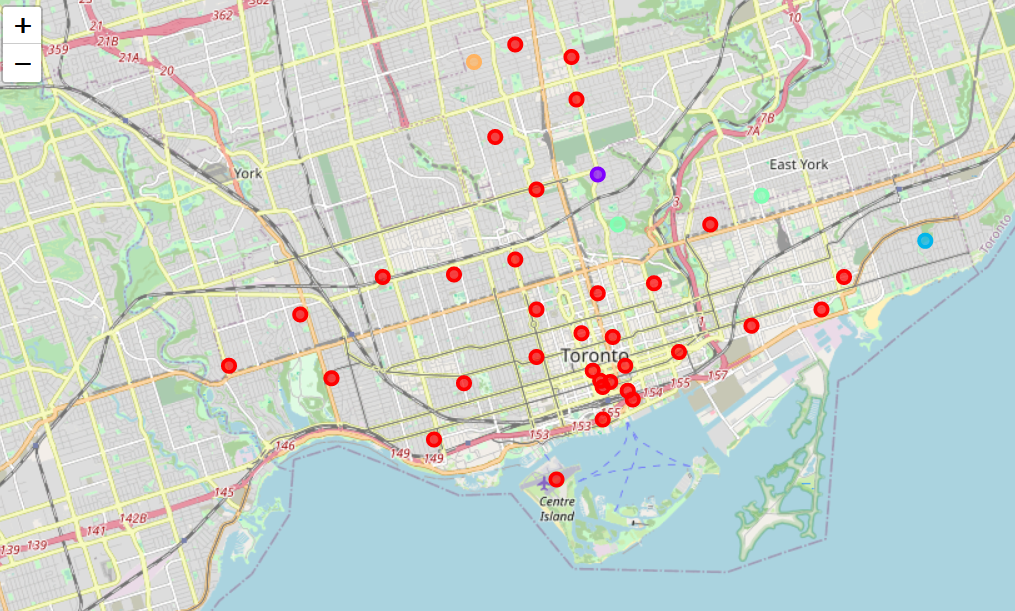

In [51]:
old_toronto_merged.loc[old_toronto_merged['Cluster Labels'] == 0, old_toronto_merged.columns[[1] + list(range(5, old_toronto_merged.shape[1]))]]
# Downtown Cafe, bars, and dining district

Borough  Cluster Labels 1st Most Common Venue  \
0   Downtown Toronto               0        Clothing Store   
1   Downtown Toronto               0                  Café   
2   Downtown Toronto               0                Bakery   
3   Downtown Toronto               0                  Café   
4   Downtown Toronto               0              Aquarium   
5   Downtown Toronto               0        Airport Lounge   
6   Downtown Toronto               0          Cocktail Bar   
7       East Toronto               0      Greek Restaurant   
8   Downtown Toronto               0           Coffee Shop   
9       West Toronto               0           Coffee Shop   
10      West Toronto               0           Music Venue   
11   Central Toronto               0                  Park   
12  Downtown Toronto               0                  Café   
13  Downtown Toronto               0           Coffee Shop   
14      West Toronto               0           Coffee Shop   
16  Downtown Toronto               0           Coffee Shop   
17  Downtown Toronto               0                  Café   
18      East Toronto               0           Coffee Shop   
19   Central Toronto               0                  Park   
20      East Toronto               0  Fast Food Restaurant   
21  Downtown Toronto               0                  Café   
22   Central Toronto               0           Coffee Shop   
24      West Toronto               0                   Bar   
25   Central Toronto               0           Coffee Shop   
26      East Toronto               0    Light Rail Station   
27  Downtown Toronto               0                  Café   
28   Central Toronto               0           Pizza Place   
30  Downtown Toronto               0         Grocery Store   
31  Downtown Toronto               0                  Café   
32      West Toronto               0                  Café   
33   Central Toronto               0        Sandwich Place   
34      West Toronto               0        Sandwich Place   
36   Central Toronto               0    Mexican Restaurant   
37  Downtown Toronto               0   Japanese Restaurant   

        2nd Most Common Venue        3rd Most Common Venue  \
0                     Theater    Middle Eastern Restaurant   
1                 Coffee Shop                   Restaurant   
2          Seafood Restaurant                 Cocktail Bar   
3                  Restaurant                  Coffee Shop   
4                       Hotel                         Park   
5             Airport Service             Airport Terminal   
6              Farmers Market                     Beer Bar   
7          Italian Restaurant               Ice Cream Shop   
8                        Park                       Bakery   
9                 Pizza Place                         Café   
10  Middle Eastern Restaurant                      Brewery   
11                       Lake                  Swim School   
12             Sandwich Place                  Coffee Shop   
13                     Bakery                         Café   
14             Breakfast Spot  Eastern European Restaurant   
16             Sandwich Place             Sushi Restaurant   
17                Coffee Shop                   Restaurant   
18                  Gastropub                         Café   
19           Department Store               Breakfast Spot   
20                        Gym                   Steakhouse   
21                     Bakery              Organic Grocery   
22                       Park                          Spa   
24      Vietnamese Restaurant             Asian Restaurant   
25           Sushi Restaurant        Vietnamese Restaurant   
26                       Park                Auto Workshop   
27                        Gym                   Restaurant   
28             Sandwich Place                  Coffee Shop   
30                       Café                         Park   
31           Sushi Restaurant               

In [52]:
old_toronto_merged.loc[old_toronto_merged['Cluster Labels'] == 1, old_toronto_merged.columns[[1] + list(range(5, old_toronto_merged.shape[1]))]]
# Workers district

Borough  Cluster Labels 1st Most Common Venue  \
15  Central Toronto               1                Lawyer   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
15            Restaurant           College Gym           Escape Room   

   5th Most Common Venue        6th Most Common Venue 7th Most Common Venue  \
15     Electronics Store  Eastern European Restaurant            Donut Shop   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
15               Dog Run   Distribution Center         Discount Store

In [53]:
old_toronto_merged.loc[old_toronto_merged['Cluster Labels'] == 2, old_toronto_merged.columns[[1] + list(range(5, old_toronto_merged.shape[1]))]]
# Very similar to workers district

Borough  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
23  East Toronto               2                   Pub     Health Food Store   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
23                 Trail      Department Store     Electronics Store   

          6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
23  Eastern European Restaurant            Donut Shop               Dog Run   

   9th Most Common Venue 10th Most Common Venue  
23   Distribution Center         Discount Store

In [54]:
old_toronto_merged.loc[old_toronto_merged['Cluster Labels'] == 3, old_toronto_merged.columns[[1] + list(range(5, old_toronto_merged.shape[1]))]]
# Parks and playgrounda

Borough  Cluster Labels 1st Most Common Venue  \
29  East York/East Toronto               3                  Park   
38        Downtown Toronto               3                  Park   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
29     Convenience Store          Intersection          Dessert Shop   
38                 Trail            Playground         Deli / Bodega   

          5th Most Common Venue        6th Most Common Venue  \
29            Electronics Store  Eastern European Restaurant   
38  Eastern European Restaurant                   Donut Shop   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
29            Donut Shop               Dog Run   Distribution Center   
38               Dog Run   Distribution Center        Discount Store   

   10th Most Common Venue  
29         Discount Store  
38                  Diner

In [55]:
old_toronto_merged.loc[old_toronto_merged['Cluster Labels'] == 4, old_toronto_merged.columns[[1] + list(range(5, old_toronto_merged.shape[1]))]]
# Second homes

Borough  Cluster Labels 1st Most Common Venue  \
35  Central Toronto               4  Fast Food Restaurant   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
35          Home Service                Garden             Wine Shop   

   5th Most Common Venue 6th Most Common Venue        7th Most Common Venue  \
35          Dessert Shop     Electronics Store  Eastern European Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
35            Donut Shop               Dog Run    Distribution Center

### 3.2 Observations from clustering <a name="item32"></a>

I have added some commentary to the identified clusters above.

The clusters do not seem well distributed and would likely benefit from changes.

The set radius of community venues is a problem as it is likely too big for downtown and too small for the outer areas.  This results in overlap of venues in the smaller areas making them appear to be more similar than they actually are and potentially missing venues in the larger districts.  

Statistics canada has shape files for the forward sortation areas and totonto.ca open data portal has shape files and listings of demographic data for all of Toronto's 140 neighborhoods.

While beyond the scope of this assignment these shape files could be used to determine which venues actually fell within the boundries of these communities to provide better data for the cluster analysis.


[Go back to Table of Contents](#toc)

## 
## 
## A better source for Toronto neighbourhood data <a name="annex1"></a>

Toronto is currently arranged in a ward system but most locals still refer to the former boroughs although it has been disputed where the actual boundaries fall.

The city identifies 140 neighbourhoods and through its opendata initiatives makes demographic and similar data available for each through an open data portal.

### The data is first pulled from the Toronto.ca open data portal

In [ ]:
import pandas as pd
import requests

url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show"
params = { "id": "6e19a90f-971c-46b3-852c-0c48c436d1fc"}
package = requests.get(url, params = params).json()

for idx, resource in enumerate(package["result"]["resources"]):
    if resource["datastore_active"]:
        url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/datastore_search"
        p = { "id": resource["id"] }
        data = requests.get(url, params = p).json()
        YYZ_open_data = pd.DataFrame(data["result"]["records"])
        break

In [ ]:
YYZ_open_data.head()

In [ ]:
print(f"The City of Toronto identifies {len(YYZ_open_data.columns)-6} neighbourhoods.\n")

check_yyz_neighbourhoods = YYZ_open_data.columns[6:].to_numpy()

print("These include: ")
print(check_yyz_neighbourhoods)

YYZ_opendata_neighbourhoods = pd.DataFrame(check_yyz_neighbourhoods)
YYZ_opendata_neighbourhoods.columns=['Neighbourhood']
YYZ_opendata_neighbourhoods

### The open data portal also has geojson files for the boundries of each neighbourhood available
This allows them to be plotted on a folium map

In [ ]:
url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show"
params = { "id": "4def3f65-2a65-4a4f-83c4-b2a4aed72d46"}
package = requests.get(url, params = params).json()

for idx, resource in enumerate(package["result"]["resources"]):
    if resource["datastore_active"]:
        url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/datastore_search"
        p = { "id": resource["id"] }
        data = requests.get(url, params = p).json()
        YYZ_boundaries = pd.DataFrame(data["result"]["records"])
        break

In [ ]:
YYZ_boundaries = YYZ_boundaries[['AREA_NAME', 'geometry']]
YYZ_boundaries.head()

### We can also use geopy to get long and lat for many of the neighbourhoods

In [ ]:
!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

In [ ]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
yyz_latitude = location.latitude
yyz_longitude = location.longitude

In [ ]:
YYZ_opendata_neighbourhoods['Latitude']=None
YYZ_opendata_neighbourhoods['Longitude']=None

for neighbourhood in check_yyz_neighbourhoods:
    address = str(neighbourhood)+', Canada'
    try:
        location = geolocator.geocode(address)
        #YYZ_opendata_neighbourhoods.loc[YYZ_opendata_neighbourhoods['Neighbourhood']==neighbourhood].Latitude=location.latitude
        #YYZ_opendata_neighbourhoods.loc[YYZ_opendata_neighbourhoods['Neighbourhood']==neighbourhood].Longitude=location.longitude
        print(f"Neighbourhood: {neighbourhood} at lat={location.latitude} and long={location.longitude}.") 
    except:
        print(f"Neighbourhood: {neighbourhood} lat and long not available")


[Go back to Table of Contents](#toc)